In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.value_counts().sum()

10000

In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#no missing data

In [9]:
#dropping the first 3 columns as they have no significance

In [10]:
dataset = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = dataset.drop('Exited',axis=1).values

In [13]:
y = dataset['Exited'].values

In [14]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
#encoding the categorical columns, LabelEncoder for Gender (as only options are male and female), and OneHotEncoder for Geography

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
X[:,2] = le.fit_transform(X[:,2])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],remainder='passthrough')

In [21]:
X = ct.fit_transform(X)

In [22]:
X.shape

(10000, 12)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Dropout

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
ann = Sequential()

In [32]:
ann.add(Dense(12, activation = 'relu'))

In [33]:
ann.add(Dense(6, activation = 'relu'))

In [34]:
#output layer
ann.add(Dense(1, activation = 'sigmoid'))

In [35]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [36]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1)

Epoch 1/200
250/250 [==============================] - 0s 574us/step - loss: 0.5206 - accuracy: 0.7790
Epoch 2/200
250/250 [==============================] - 0s 629us/step - loss: 0.4467 - accuracy: 0.8015
Epoch 3/200
250/250 [==============================] - 0s 590us/step - loss: 0.4273 - accuracy: 0.8164
Epoch 4/200
250/250 [==============================] - 0s 566us/step - loss: 0.4166 - accuracy: 0.8246
Epoch 5/200
250/250 [==============================] - 0s 579us/step - loss: 0.4090 - accuracy: 0.8279
Epoch 6/200
250/250 [==============================] - 0s 613us/step - loss: 0.4020 - accuracy: 0.8311
Epoch 7/200
250/250 [==============================] - 0s 650us/step - loss: 0.3946 - accuracy: 0.8344
Epoch 8/200
250/250 [==============================] - 0s 580us/step - loss: 0.3869 - accuracy: 0.8388
Epoch 9/200
250/250 [==============================] - 0s 564us/step - loss: 0.3787 - accuracy: 0.8422
Epoch 10/200
250/250 [==============================] - 0s 568us/step - l

250/250 [==============================] - 0s 537us/step - loss: 0.3212 - accuracy: 0.8662
Epoch 80/200
250/250 [==============================] - 0s 541us/step - loss: 0.3216 - accuracy: 0.8683
Epoch 81/200
250/250 [==============================] - 0s 539us/step - loss: 0.3212 - accuracy: 0.8661
Epoch 82/200
250/250 [==============================] - 0s 526us/step - loss: 0.3215 - accuracy: 0.8674
Epoch 83/200
250/250 [==============================] - 0s 540us/step - loss: 0.3213 - accuracy: 0.8668
Epoch 84/200
250/250 [==============================] - 0s 547us/step - loss: 0.3213 - accuracy: 0.8680
Epoch 85/200
250/250 [==============================] - 0s 531us/step - loss: 0.3214 - accuracy: 0.8675
Epoch 86/200
250/250 [==============================] - 0s 561us/step - loss: 0.3212 - accuracy: 0.8686
Epoch 87/200
250/250 [==============================] - 0s 544us/step - loss: 0.3211 - accuracy: 0.8668
Epoch 88/200
250/250 [==============================] - 0s 558us/step - loss:

250/250 [==============================] - 0s 537us/step - loss: 0.3168 - accuracy: 0.8690
Epoch 158/200
250/250 [==============================] - 0s 577us/step - loss: 0.3179 - accuracy: 0.8685
Epoch 159/200
250/250 [==============================] - 0s 549us/step - loss: 0.3173 - accuracy: 0.8686
Epoch 160/200
250/250 [==============================] - 0s 562us/step - loss: 0.3177 - accuracy: 0.8692
Epoch 161/200
250/250 [==============================] - 0s 681us/step - loss: 0.3173 - accuracy: 0.8695
Epoch 162/200
250/250 [==============================] - 0s 653us/step - loss: 0.3168 - accuracy: 0.8702
Epoch 163/200
250/250 [==============================] - 0s 599us/step - loss: 0.3176 - accuracy: 0.8694
Epoch 164/200
250/250 [==============================] - 0s 574us/step - loss: 0.3172 - accuracy: 0.8679
Epoch 165/200
250/250 [==============================] - 0s 558us/step - loss: 0.3175 - accuracy: 0.8698
Epoch 166/200
250/250 [==============================] - 0s 604us/ste

In [37]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

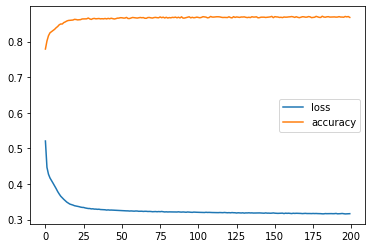

In [38]:
losses.plot()

In [39]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 186  219]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.862

In [62]:
#adding early stop criteria

In [70]:
early_stop = EarlyStopping(monitor='val_loss',patience=50, verbose=1)

In [71]:
ann = Sequential()
ann.add(Dense(12, activation = 'relu'))
ann.add(Dense(6, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [72]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [73]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1, callbacks=[early_stop], validation_data=(X_test,y_test))

Epoch 1/200
250/250 [==============================] - 1s 1ms/step - loss: 0.6607 - accuracy: 0.6236 - val_loss: 0.5169 - val_accuracy: 0.8000
Epoch 2/200
250/250 [==============================] - 0s 709us/step - loss: 0.4669 - accuracy: 0.8006 - val_loss: 0.4459 - val_accuracy: 0.8035
Epoch 3/200
250/250 [==============================] - 0s 696us/step - loss: 0.4336 - accuracy: 0.8005 - val_loss: 0.4255 - val_accuracy: 0.8040
Epoch 4/200
250/250 [==============================] - 0s 716us/step - loss: 0.4214 - accuracy: 0.8058 - val_loss: 0.4151 - val_accuracy: 0.8075
Epoch 5/200
250/250 [==============================] - 0s 751us/step - loss: 0.4117 - accuracy: 0.8090 - val_loss: 0.4037 - val_accuracy: 0.8105
Epoch 6/200
250/250 [==============================] - 0s 705us/step - loss: 0.4014 - accuracy: 0.8124 - val_loss: 0.3914 - val_accuracy: 0.8160
Epoch 7/200
250/250 [==============================] - 0s 799us/step - loss: 0.3907 - accuracy: 0.8175 - val_loss: 0.3839 - val_accu

250/250 [==============================] - 0s 699us/step - loss: 0.3274 - accuracy: 0.8669 - val_loss: 0.3408 - val_accuracy: 0.8535
Epoch 58/200
250/250 [==============================] - 0s 735us/step - loss: 0.3273 - accuracy: 0.8664 - val_loss: 0.3404 - val_accuracy: 0.8605
Epoch 59/200
250/250 [==============================] - 0s 711us/step - loss: 0.3275 - accuracy: 0.8666 - val_loss: 0.3410 - val_accuracy: 0.8560
Epoch 60/200
250/250 [==============================] - 0s 703us/step - loss: 0.3266 - accuracy: 0.8683 - val_loss: 0.3383 - val_accuracy: 0.8575
Epoch 61/200
250/250 [==============================] - 0s 721us/step - loss: 0.3271 - accuracy: 0.8680 - val_loss: 0.3392 - val_accuracy: 0.8585
Epoch 62/200
250/250 [==============================] - 0s 899us/step - loss: 0.3266 - accuracy: 0.8681 - val_loss: 0.3397 - val_accuracy: 0.8580
Epoch 63/200
250/250 [==============================] - 0s 764us/step - loss: 0.3263 - accuracy: 0.8670 - val_loss: 0.3400 - val_accuracy

250/250 [==============================] - 0s 711us/step - loss: 0.3214 - accuracy: 0.8709 - val_loss: 0.3373 - val_accuracy: 0.8555
Epoch 114/200
250/250 [==============================] - 0s 732us/step - loss: 0.3211 - accuracy: 0.8685 - val_loss: 0.3392 - val_accuracy: 0.8555
Epoch 115/200
250/250 [==============================] - 0s 683us/step - loss: 0.3211 - accuracy: 0.8717 - val_loss: 0.3424 - val_accuracy: 0.8505
Epoch 116/200
250/250 [==============================] - 0s 675us/step - loss: 0.3214 - accuracy: 0.8695 - val_loss: 0.3411 - val_accuracy: 0.8515
Epoch 117/200
250/250 [==============================] - 0s 693us/step - loss: 0.3215 - accuracy: 0.8714 - val_loss: 0.3392 - val_accuracy: 0.8555
Epoch 118/200
250/250 [==============================] - 0s 689us/step - loss: 0.3210 - accuracy: 0.8690 - val_loss: 0.3396 - val_accuracy: 0.8515
Epoch 119/200
250/250 [==============================] - 0s 683us/step - loss: 0.3208 - accuracy: 0.8698 - val_loss: 0.3385 - val_ac

In [74]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

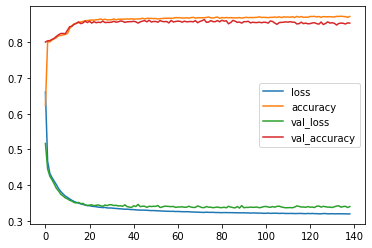

In [75]:
losses.plot()

In [76]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1504   91]
 [ 203  202]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.853

In [48]:
#adding dropout layers
ann = Sequential()
ann.add(Dense(12, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(6, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(1, activation = 'sigmoid'))

In [49]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')
ann.fit(x=X_train,y=y_train, batch_size=None, epochs=600, verbose=1, 
        callbacks=[early_stop], validation_data=(X_test,y_test))

Epoch 1/600
250/250 [==============================] - 1s 1ms/step - loss: 0.8382 - accuracy: 0.5290 - val_loss: 0.6410 - val_accuracy: 0.7730
Epoch 2/600
250/250 [==============================] - 0s 785us/step - loss: 0.6286 - accuracy: 0.7579 - val_loss: 0.5802 - val_accuracy: 0.7975
Epoch 3/600
250/250 [==============================] - 0s 709us/step - loss: 0.5656 - accuracy: 0.7900 - val_loss: 0.5311 - val_accuracy: 0.7975
Epoch 4/600
250/250 [==============================] - 0s 729us/step - loss: 0.5335 - accuracy: 0.7970 - val_loss: 0.5054 - val_accuracy: 0.7975
Epoch 5/600
250/250 [==============================] - 0s 751us/step - loss: 0.5174 - accuracy: 0.7996 - val_loss: 0.4896 - val_accuracy: 0.7975
Epoch 6/600
250/250 [==============================] - 0s 714us/step - loss: 0.4952 - accuracy: 0.8004 - val_loss: 0.4733 - val_accuracy: 0.7975
Epoch 7/600
250/250 [==============================] - 0s 716us/step - loss: 0.4883 - accuracy: 0.8036 - val_loss: 0.4635 - val_accu

250/250 [==============================] - 0s 726us/step - loss: 0.4145 - accuracy: 0.8286 - val_loss: 0.3739 - val_accuracy: 0.8345
Epoch 58/600
250/250 [==============================] - 0s 688us/step - loss: 0.4189 - accuracy: 0.8274 - val_loss: 0.3753 - val_accuracy: 0.8315
Epoch 59/600
250/250 [==============================] - 0s 711us/step - loss: 0.4213 - accuracy: 0.8255 - val_loss: 0.3740 - val_accuracy: 0.8335
Epoch 60/600
250/250 [==============================] - 0s 694us/step - loss: 0.4159 - accuracy: 0.8274 - val_loss: 0.3706 - val_accuracy: 0.8380
Epoch 61/600
250/250 [==============================] - 0s 710us/step - loss: 0.4197 - accuracy: 0.8289 - val_loss: 0.3756 - val_accuracy: 0.8315
Epoch 62/600
250/250 [==============================] - 0s 716us/step - loss: 0.4188 - accuracy: 0.8265 - val_loss: 0.3733 - val_accuracy: 0.8335
Epoch 63/600
250/250 [==============================] - 0s 727us/step - loss: 0.4206 - accuracy: 0.8259 - val_loss: 0.3738 - val_accuracy

250/250 [==============================] - 0s 690us/step - loss: 0.4107 - accuracy: 0.8291 - val_loss: 0.3627 - val_accuracy: 0.8480
Epoch 114/600
250/250 [==============================] - 0s 693us/step - loss: 0.4104 - accuracy: 0.8282 - val_loss: 0.3612 - val_accuracy: 0.8480
Epoch 115/600
250/250 [==============================] - 0s 696us/step - loss: 0.4178 - accuracy: 0.8266 - val_loss: 0.3640 - val_accuracy: 0.8405
Epoch 116/600
250/250 [==============================] - 0s 713us/step - loss: 0.4138 - accuracy: 0.8300 - val_loss: 0.3647 - val_accuracy: 0.8400
Epoch 117/600
250/250 [==============================] - 0s 704us/step - loss: 0.4080 - accuracy: 0.8353 - val_loss: 0.3632 - val_accuracy: 0.8405
Epoch 118/600
250/250 [==============================] - 0s 681us/step - loss: 0.4095 - accuracy: 0.8314 - val_loss: 0.3599 - val_accuracy: 0.8495
Epoch 119/600
250/250 [==============================] - 0s 722us/step - loss: 0.4152 - accuracy: 0.8307 - val_loss: 0.3645 - val_ac

Epoch 169/600
250/250 [==============================] - 0s 695us/step - loss: 0.4116 - accuracy: 0.8331 - val_loss: 0.3554 - val_accuracy: 0.8615
Epoch 170/600
250/250 [==============================] - 0s 672us/step - loss: 0.4137 - accuracy: 0.8291 - val_loss: 0.3566 - val_accuracy: 0.8595
Epoch 171/600
250/250 [==============================] - 0s 750us/step - loss: 0.4015 - accuracy: 0.8334 - val_loss: 0.3573 - val_accuracy: 0.8525
Epoch 172/600
250/250 [==============================] - 0s 696us/step - loss: 0.4050 - accuracy: 0.8360 - val_loss: 0.3556 - val_accuracy: 0.8540
Epoch 173/600
250/250 [==============================] - 0s 696us/step - loss: 0.4120 - accuracy: 0.8309 - val_loss: 0.3582 - val_accuracy: 0.8520
Epoch 174/600
250/250 [==============================] - 0s 744us/step - loss: 0.4100 - accuracy: 0.8294 - val_loss: 0.3557 - val_accuracy: 0.8560
Epoch 175/600
250/250 [==============================] - 0s 824us/step - loss: 0.4057 - accuracy: 0.8342 - val_loss: 0

Epoch 225/600
250/250 [==============================] - 0s 674us/step - loss: 0.4072 - accuracy: 0.8328 - val_loss: 0.3553 - val_accuracy: 0.8520
Epoch 226/600
250/250 [==============================] - 0s 678us/step - loss: 0.4135 - accuracy: 0.8259 - val_loss: 0.3586 - val_accuracy: 0.8470
Epoch 227/600
250/250 [==============================] - 0s 694us/step - loss: 0.4061 - accuracy: 0.8330 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 228/600
250/250 [==============================] - 0s 719us/step - loss: 0.4070 - accuracy: 0.8324 - val_loss: 0.3571 - val_accuracy: 0.8505
Epoch 229/600
250/250 [==============================] - 0s 735us/step - loss: 0.4115 - accuracy: 0.8288 - val_loss: 0.3551 - val_accuracy: 0.8570
Epoch 230/600
250/250 [==============================] - 0s 696us/step - loss: 0.4161 - accuracy: 0.8284 - val_loss: 0.3585 - val_accuracy: 0.8495
Epoch 231/600
250/250 [==============================] - 0s 696us/step - loss: 0.4097 - accuracy: 0.8307 - val_loss: 0

Epoch 281/600
250/250 [==============================] - 0s 692us/step - loss: 0.4119 - accuracy: 0.8324 - val_loss: 0.3510 - val_accuracy: 0.8640
Epoch 282/600
250/250 [==============================] - 0s 680us/step - loss: 0.4092 - accuracy: 0.8325 - val_loss: 0.3535 - val_accuracy: 0.8565
Epoch 283/600
250/250 [==============================] - 0s 712us/step - loss: 0.4078 - accuracy: 0.8338 - val_loss: 0.3550 - val_accuracy: 0.8515
Epoch 284/600
250/250 [==============================] - 0s 700us/step - loss: 0.4019 - accuracy: 0.8372 - val_loss: 0.3524 - val_accuracy: 0.8625
Epoch 285/600
250/250 [==============================] - 0s 791us/step - loss: 0.4021 - accuracy: 0.8339 - val_loss: 0.3489 - val_accuracy: 0.8650
Epoch 286/600
250/250 [==============================] - 0s 713us/step - loss: 0.4096 - accuracy: 0.8321 - val_loss: 0.3511 - val_accuracy: 0.8620
Epoch 287/600
250/250 [==============================] - 0s 689us/step - loss: 0.4054 - accuracy: 0.8332 - val_loss: 0

In [67]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

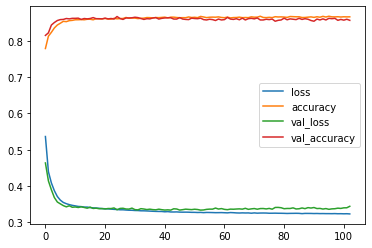

In [68]:
losses.plot()

In [69]:
y_pred = ann.predict_classes(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1495  100]
 [ 187  218]]


D:\Python\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8565

In [53]:
#Use our ANN model to predict if the customer with the following informations will leave the bank:

#Geography: France

#Credit Score: 600

#Gender: Male

#Age: 40 years old

#Tenure: 3 years

#Balance: $ 60000

#Number of Products: 2

#Does this customer have a credit card ? Yes

#Is this customer an Active Member: Yes

#Estimated Salary: $ 50000

#will the customer stay or leave ?

In [54]:
ct.transform([[600, 'France', 1, 40, 3, 60000, 2, 1, 1, 50000]])

array([[1.0, 0.0, 0.0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]],
      dtype=object)

In [84]:
int(ann.predict((sc.transform(ct.transform([[600, 'France', 1, 40, 3, 60000, 2, 1, 1, 50000]])))) > 0.5)

0

In [85]:
#so the customer won't leave the bank